In [1]:
# sudo apt-get update
# sudo apt-get install libproj-dev

install.packages('devtools')
install.packages("zoo")
install.packages("proj4")
install.packages("ggalt")
install.packages("xtable")
install.packages("jsonlite")
install.packages("ggalt", dependencies = TRUE)

devtools::install_github('bbc/bbplot')

#This line of code installs the pacman page if you do not have it installed - if you do, it simply loads the package
if(!require(pacman))install.packages("pacman")

pacman::p_load('dplyr', 'tidyr', 'gapminder',
               'ggplot2',
               'forcats', 'R.utils', 'png', 
               'grid', 'ggpubr', 'scales',
               'bbplot')

# Colors
colors <- c("Linguistics" = "#eae059",
            "Mathematics" = "#469c75",
            "Psychology" = "#f0b2e0",
            "Sociology" = "#d39334",
            "ML" = "#543115",
            "NLP" = "#000000",
            "CS" = "#2b6218")

general_theme <- theme(
    plot.subtitle = element_text(size = 20),
    legend.position = "top",
    legend.justification = "left",
    axis.text.x = ggplot2::element_text(margin=ggplot2::margin(12, b = 0)),
    axis.ticks = element_line(size = 0.5, color = "black"),
    axis.ticks.length = unit(0.25, "cm"),
    axis.ticks.y = element_blank(),
    axis.line.x = element_line(colour = "#333333", size = 1, linetype = "solid")
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘ash’, ‘maps’, ‘extrafont’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggthemes’


Using github PAT from envvar GITHUB_TOKEN




tidyr      (1.3.0   -> 1.3.1 ) [CRAN]
data.table (1.14.10 -> 1.15.0) [CRAN]
png        (NA      -> 0.1-8 ) [CRAN]


Installing 3 packages: tidyr, data.table, png

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp7lRmUl/remotes6e24ee62cfc/bbc-bbplot-82af595/DESCRIPTION’ ... OK
* preparing ‘bbplot’:
* checking DESCRIPTION meta-information ...Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
 OK
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gapminder installed

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [4]:
library(stringr)
library(ggplot2)
library(dplyr)
library(readr)

# Load the data
nlp_papers <- read_csv('./data/byfield/NLP_paper_to_stats.csv', show_col_types = FALSE)

In [5]:
library(dplyr)
library(zoo)
library(ggplot2)
library(readr)
library(stringr)

fields <- c("NLP", "Mathematics", "Linguistics", "Sociology", "ML", "Psychology")

all_data = list()
peak_to_latest_changes = data.frame(field = character(), peak_year = integer(), peak_value = numeric(), latest_year = integer(), latest_value = numeric(), change = numeric())

# Loop through each field to load and process the data
for(field in fields) {
  filename <- paste0('./data/byfield/', field, '_paper_to_stats.csv')
  papers <- read_csv(filename, show_col_types = FALSE)
  
  # Filter and process the papers
  filtered_papers <- papers %>%
    filter(year >= 1980 & year <= 2022)

  expanded_data <- filtered_papers %>%
    mutate(outgoing_list = str_replace_all(outgoing_citation_ages, "\\[|\\]", "")) %>%
    mutate(outgoing_list = str_split(outgoing_list, pattern = ",\\s*")) %>%
    unnest(outgoing_list) %>%
    mutate(outgoing_age = as.numeric(outgoing_list))

  aggregated_data <- expanded_data %>%
    group_by(year) %>%
    summarise(older_citation_pct = mean(outgoing_age > 10, na.rm = TRUE),
              .groups = 'drop')

  aggregated_data$rolling_5yr <- rollmean(aggregated_data$older_citation_pct, k = 5, fill = NA, align = "right")

  # Find the peak year and value for the rolling average
  peak_data <- aggregated_data[which.max(aggregated_data$rolling_5yr), ]
  latest_data <- tail(aggregated_data, 1)

  # Calculate the change from the peak to the latest year
  change <- latest_data$rolling_5yr - peak_data$rolling_5yr

  # Add the change data to the peak_to_latest_changes dataframe
  peak_to_latest_changes <- rbind(peak_to_latest_changes, data.frame(field = field, peak_year = peak_data$year, peak_value = peak_data$rolling_5yr, latest_year = latest_data$year, latest_value = latest_data$rolling_5yr, change = change))

  # Add a field column to keep track of the data's origin
  aggregated_data$field <- field

  all_data[[field]] <- aggregated_data
}

# Combine all the data into a single dataframe
final_data <- bind_rows(all_data)

# Output the changes from peak to latest for each field
print(peak_to_latest_changes)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




        field peak_year peak_value latest_year latest_value      change
1         NLP      2005  0.3997831        2022    0.2714804 -0.12830271
2 Mathematics      2015  0.3902605        2022    0.3620623 -0.02819815
3 Linguistics      2016  0.4161410        2022    0.3703659 -0.04577514
4   Sociology      2020  0.4086943        2022    0.3854359 -0.02325837
5          ML      2017  0.3604895        2022    0.3053938 -0.05509568
6  Psychology      2020  0.4167445        2022    0.3940800 -0.02266452



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Saving 6.67 x 6.67 in image
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”


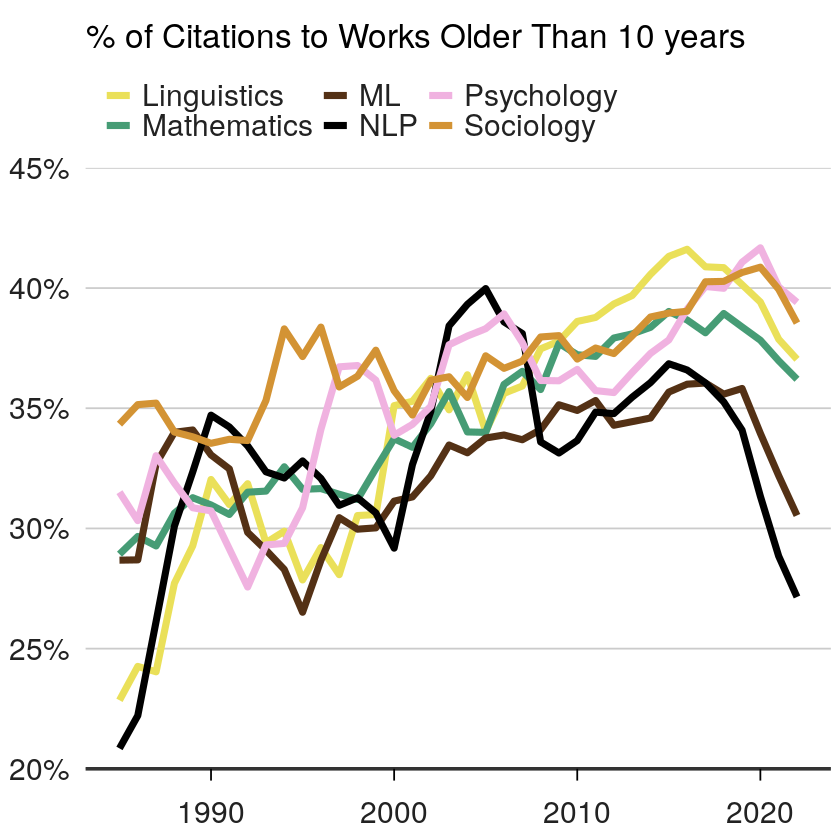

In [3]:
# Assuming the already provided libraries are loaded
library(dplyr)
library(zoo)

fields <- c("NLP", "Mathematics", "Linguistics", "Sociology", "ML", "Psychology")

all_data = list()

# Loop through each field to load and process the data
for(field in fields) {
  filename <- paste0('./data/byfield/', field, '_paper_to_stats.csv')
  papers <- read_csv(filename, show_col_types = FALSE)
  
  # Filter and process the papers just as you did above
  filtered_papers <- papers %>%
    filter(year >= 1980 & year <=2022)

  expanded_data <- filtered_papers %>%
    mutate(outgoing_list = str_replace_all(outgoing_citation_ages, "\\[|\\]", "")) %>%
    mutate(outgoing_list = str_split(outgoing_list, pattern = ",\\s*")) %>%
    unnest(outgoing_list) %>%
    mutate(outgoing_age = as.numeric(outgoing_list))

  aggregated_data <- expanded_data %>%
    group_by(year) %>%
    summarise(older_citation_pct = mean(outgoing_age > 10, na.rm = TRUE),
              .groups = 'drop')

  aggregated_data$rolling_5yr <- rollmean(aggregated_data$older_citation_pct, k = 5, fill = NA, align = "right")

  # Add a field column to keep track of the data's origin
  aggregated_data$field <- field

  all_data[[field]] <- aggregated_data
}

# Combine all the data into a single dataframe
final_data <- bind_rows(all_data)

# Plot
p <- ggplot(data = final_data, aes(x = year, y = rolling_5yr, color = field)) +
  geom_line(lwd=2) +
  labs(subtitle = "% of Citations to Works Older Than 10 years") +
  theme_minimal() +
  scale_color_manual(values = colors) +
  scale_y_continuous(labels = scales::percent_format(scale = 100), limits = c(0.2, 0.45),expand = c(0, 0)) +
  bbc_style() +
  xlim(1985, 2022) +
  general_theme

# Save the plot as a png and pdf
ggsave("./figures/perc_citationns_to_older_works.png", p, dpi = 300)
ggsave("./figures/perc_citationns_to_older_works.pdf", p)

# Show the plot
p

Rows: 1219 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): field
dbl (2): year, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 6.67 x 6.67 in image
Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”


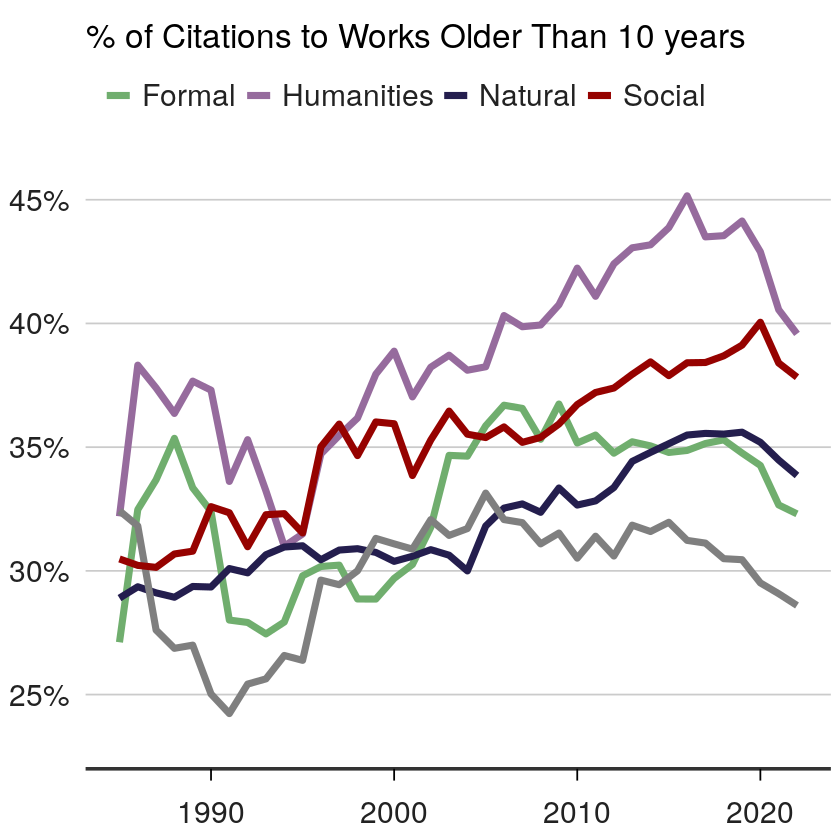

In [14]:
# Load necessary libraries
library(dplyr)
library(readr)
library(ggplot2)
library(zoo)
library(stringr)
library(tidyr)
library(zoo)

# Load the data
works_data <- read_csv("data/works_by_year_and_concept.csv")

# Define the fields
fields <- c("Computer science", "Medicine", "Biology", "Physics", "Political science", 
            "Chemistry", "Engineering", "Philosophy", "Mathematics", "Psychology", 
            "Materials science", "Art", "Geography", "Business", "Sociology", 
            "Economics", "AI", "Geology", "History", 
            "Environmental science", "ML", "NLP")

# According to https://en.wikipedia.org/wiki/List_of_academic_fields
category_mapping <- list(
  Social = c("Political science", "Psychology", "Sociology", "Economics", "Geography", "Business"),
  Natural = c("Biology", "Physics", "Chemistry", "Environmental science", "Medicine", "Geology", "Materials science"),
  Formal = c("Computer science", "Mathematics", "AI", "ML", "NLP"),
  Humanities = c("Art", "History", "Philosophy")
)

all_data = list()

# Loop through each field to load and process the data
for(field in fields) {
  filename <- paste0('./data/byfield/', field, '_paper_to_stats.csv')
  papers <- read_csv(filename, show_col_types = FALSE)
  
  # Filter and process the papers
  filtered_papers <- papers %>%
    filter(year >= 1980 & year <= 2022)

  expanded_data <- filtered_papers %>%
    mutate(outgoing_list = str_replace_all(outgoing_citation_ages, "\\[|\\]", "")) %>%
    mutate(outgoing_list = str_split(outgoing_list, pattern = ",\\s*")) %>%
    unnest(outgoing_list) %>%
    mutate(outgoing_age = as.numeric(outgoing_list))

  aggregated_data <- expanded_data %>%
    group_by(year) %>%
    summarise(older_citation_pct = mean(outgoing_age > 10, na.rm = TRUE),
              .groups = 'drop')

  aggregated_data$rolling_5yr <- rollmean(aggregated_data$older_citation_pct, k = 5, fill = NA, align = "right")

  # Add a field column to keep track of the data's origin
  aggregated_data$field <- field

  all_data[[field]] <- aggregated_data
}

# Combine all the data into a single dataframe
final_data <- bind_rows(all_data)

# Function to map fields to categories
map_field_to_category <- function(field, mapping) {
  for (category in names(mapping)) {
    if (field %in% mapping[[category]]) {
      return(category)
    }
  }
  return("Other")
}

# Apply the mapping to the final_data
final_data$category <- sapply(final_data$field, map_field_to_category, mapping = category_mapping)

# Renaming the fields in works_data to match those in final_data
works_data <- works_data %>%
  mutate(field = case_when(
    field == 'Natural language processing' ~ 'NLP',
    field == 'Machine learning' ~ 'ML',
    field == 'Artificial intelligence' ~ 'AI',
    # Add other mappings for fields as necessary
    TRUE ~ field
  ))

# Merging the citation age data with the volume data
merged_data <- final_data %>%
  inner_join(works_data, by = c("field", "year"))

# Adjusting the merged_data to include categories
merged_data$category <- sapply(merged_data$field, map_field_to_category, mapping = category_mapping)

# Computing the volume-weighted average citation age per category
volume_weighted_avg_per_category <- merged_data %>%
  group_by(category, year) %>%
  summarise(weighted_avg_age = sum(older_citation_pct * count) / sum(count),
            .groups = 'drop')

# Computing a rolling average per category
volume_weighted_avg_per_category <- volume_weighted_avg_per_category %>%
  group_by(category) %>%
  mutate(rolling_avg = rollmean(weighted_avg_age, k = 5, fill = NA, align = "right")) %>%
  ungroup()

# Define custom colors for the plot (adjust as needed)
colors_groups <- c("Social" = "#960200", 
                   "Natural" = "#241E4E", 
                   "Formal" = "#70AE6E", 
                   "Humanities" = "#966B9D")

# Plotting with bbc_style and smoother lines
p <- ggplot(data = volume_weighted_avg_per_category, aes(x = year, y = rolling_avg, color = category)) +
  geom_line(lwd = 2) +  # thicker lines
  labs(subtitle = "% of Citations to Works Older Than 10 years",
       x = "Year",
       y = "Weighted Average Citation Age") +
  theme_minimal() +
  scale_color_manual(values = colors_groups) +
  scale_y_continuous(labels = scales::percent_format(scale = 100), breaks = seq(0.2, 0.5, by = 0.05), limits = c(0.22, 0.475), expand = c(0, 0)) +
  bbc_style() +
  xlim(1985, 2022) +
  general_theme

# Save it as png and pdf
ggsave("./figures/volume_weighted_avg_citation_age.png", p, dpi = 300)
ggsave("./figures/volume_weighted_avg_citation_age.pdf", p)

p

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


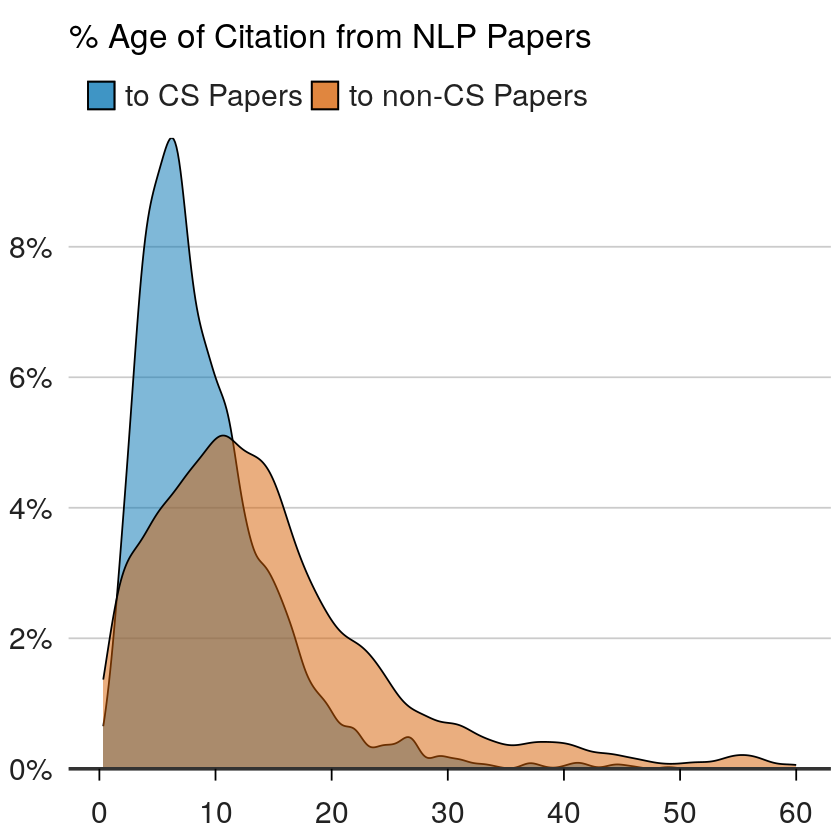

In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(scales)  # for pretty_breaks() and percent()

# Load the data
nlp_papers <- read_csv('./data/byfield/NLP_paper_to_stats.csv', show_col_types = FALSE)

# Filter conditions
nlp_papers <- nlp_papers %>%
  filter(!is.na(avg_outgoing_citation_age_cs) & avg_outgoing_citation_age_cs != 0 & avg_outgoing_citation_age_cs <= 60 &
         !is.na(avg_outgoing_citation_age_non_cs) & avg_outgoing_citation_age_non_cs != 0 & avg_outgoing_citation_age_non_cs <= 60)

# Create ggplot
p <- ggplot() + 
  # CS distribution
  geom_density(data = nlp_papers, aes(x = avg_outgoing_citation_age_cs, fill = "to CS Papers"), alpha = 0.5) +
  # Non-CS distribution
  geom_density(data = nlp_papers, aes(x = avg_outgoing_citation_age_non_cs, fill = "to non-CS Papers"), alpha = 0.5) +
  labs(subtitle = "% Age of Citation from NLP Papers",
       x = "Average Outgoing Citation Age",
       y = "Density (%)") +  # Updated y label
  # Adjust x-ticks and y-ticks
  scale_x_continuous(breaks = pretty_breaks()) +
  scale_y_continuous(labels = percent_format(scale = 100), breaks = pretty_breaks(), limits = c(0.0, NA), expand = c(0.0, 0.0)) +  # Format y labels as percentages
  # Custom color scale for the legend
  scale_fill_manual(values = c("to CS Papers" = "#0072B2", "to non-CS Papers" = "#D55E00"), name = "Field") +
  bbc_style() +
  general_theme
  
# Save the plots as png and pdf
ggsave("./figures/citation_age_distr_cs_vs_non_cs.png", p, dpi = 300)
ggsave("./figures/citation_age_distr_cs_vs_non_cs.pdf", p)

# Print the plot
print(p)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 15 in image
Saving 6.67 x 15 in image


# A tibble: 7 × 2
  field              avg
  <fct>            <dbl>
1 NLP               9.22
2 ML                9.54
3 Computer science  9.68
4 Psychology       10.5 
5 Sociology        10.6 
6 Linguistics      11.0 
7 Mathematics      11.1 


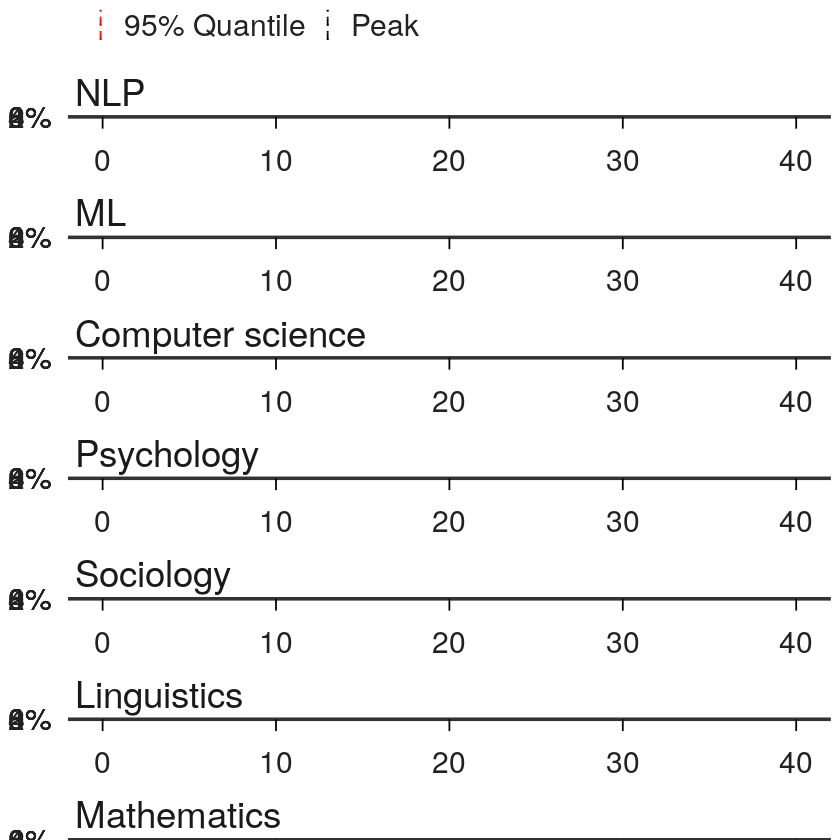

In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(scales)  # for pretty_breaks()

# Define a function to read and process data for each field
prepare_data <- function(fieldname) {
  data <- read_csv(paste0('./data/byfield/', fieldname, '_paper_to_stats.csv'), show_col_types = FALSE)
  data <- data %>%
    filter(!is.na(avg_outgoing_citation_age) & avg_outgoing_citation_age != 0 & avg_outgoing_citation_age <= 40)
  data$field <- fieldname  # Add a field column
  
  # Compute the peak and the 95% quantile
  density_data <- density(data$avg_outgoing_citation_age)
  peak <- density_data$x[which.max(density_data$y)]
  quantile_95 <- quantile(data$avg_outgoing_citation_age, 0.95)
  
  data$peak <- peak
  data$quantile_95 <- quantile_95
  
  return(data)
}

# List of fields to consider
fields <- c("NLP", "Computer science", "Linguistics", "Mathematics", "Psychology", "Sociology", "ML")

# Use lapply to apply prepare_data to each field
data_list <- lapply(fields, prepare_data)

# Combine all datasets into one
all_data <- do.call(rbind, data_list)

# Define custom order for facets
all_data$field <- factor(all_data$field, levels = c("NLP", "ML", "Computer science", "Psychology", "Sociology", "Linguistics", "Mathematics"))

# Create ggplot with facets
p <- ggplot(all_data, aes(x = avg_outgoing_citation_age, fill = field)) +
  geom_density(alpha = 0.5, show.legend = FALSE) + # Hide legend here
  geom_vline(aes(xintercept = peak, color = "Peak"), linetype="dashed") +
  geom_vline(aes(xintercept = quantile_95, color = "95% Quantile"), linetype="dotted") +
  labs(subtitle = "% Age of Citations Across Different Fields",
       x = "Average Outgoing Citation Age",
       y = "Density") +
  scale_x_continuous(breaks = pretty_breaks(), limits = c(0, 40)) + 
  scale_y_continuous(labels = abs, breaks = pretty_breaks()) +
  scale_fill_manual(values = colors) +
  scale_color_manual(values = c("Peak" = "black", "95% Quantile" = "red"), name = "Metrics") + # Color legend for lines
  scale_y_continuous(labels = percent_format(scale = 100), breaks = pretty_breaks(), limits = c(0.0, NA), expand = c(0.0, 0.0)) +  # Format y labels as percentages
  facet_wrap(~field, ncol = 1, scales = "free_x") +
  theme(plot.subtitle = element_text(size = 20),
        legend.position = "top",
        legend.justification = "left",
        panel.spacing.x = unit(1, "cm")) +
  bbc_style() +
  general_theme +
  theme(
    panel.grid.major.x = element_line(color = "lightgrey"),  # Adds major vertical grid lines
  )

# Save the plots as png and pdf
ggsave("./figures/citation_age_distr_different_fields_1x6.png", p, dpi = 300, height = 15)
ggsave("./figures/citation_age_distr_different_fields_1x6.pdf", p, height = 15)

# Print the plot
print(p)

# Print the averages for each field
avgs = all_data %>%
  group_by(field) %>%
  summarise(avg = mean(avg_outgoing_citation_age, na.rm = TRUE))

print(avgs)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 15 in image
Saving 6.67 x 15 in image


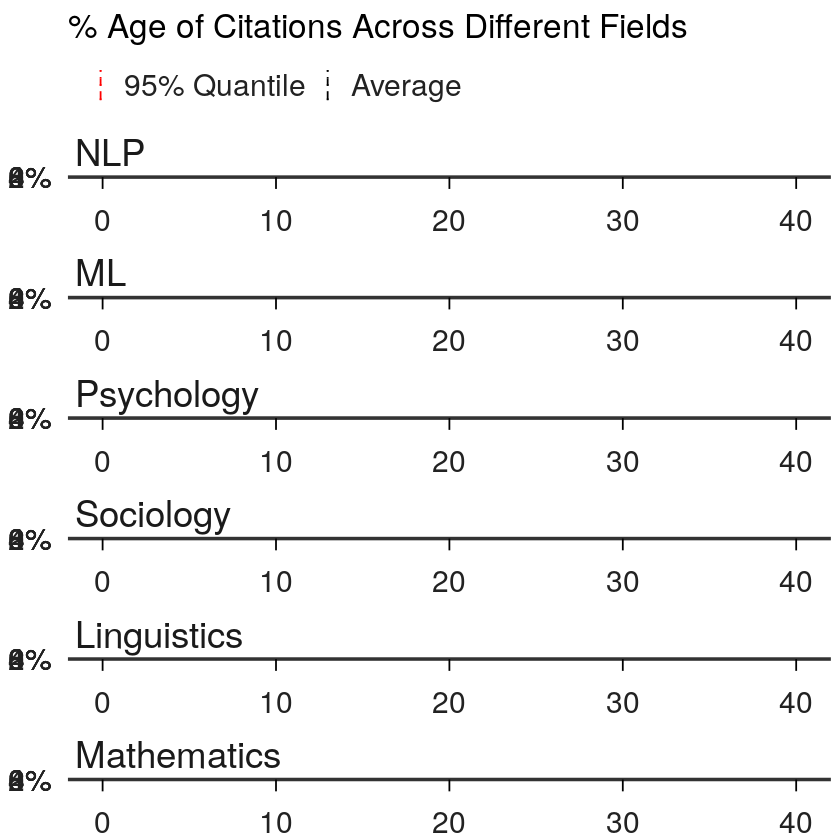

In [ ]:
# Modify the prepare_data function
prepare_data <- function(fieldname) {
  data <- read_csv(paste0('./data/byfield/', fieldname, '_paper_to_stats.csv'), show_col_types = FALSE)
  data <- data %>%
    filter(!is.na(avg_outgoing_citation_age) & avg_outgoing_citation_age != 0 & avg_outgoing_citation_age <= 40)
  data$field <- fieldname  # Add a field column
  
  # Compute the average and the 95% quantile
  average <- mean(data$avg_outgoing_citation_age)
  quantile_95 <- quantile(data$avg_outgoing_citation_age, 0.95)
  
  data$average <- average
  data$quantile_95 <- quantile_95
  
  return(data)
}

# List of fields to consider
fields <- c("NLP", "Linguistics", "Mathematics", "Psychology", "Sociology", "ML")

# Use lapply to apply prepare_data to each field
data_list <- lapply(fields, prepare_data)

# Combine all datasets into one
all_data <- do.call(rbind, data_list)

# Define custom order for facets
all_data$field <- factor(all_data$field, levels = c("NLP", "ML", "Psychology", "Sociology", "Linguistics", "Mathematics"))

# Create ggplot with facets
p <- ggplot(all_data, aes(x = avg_outgoing_citation_age, fill = field)) +
geom_density(alpha = 0.5, show.legend = FALSE) +
  geom_vline(aes(xintercept = average, color = "Average"), linetype="dashed") +  # Use "Average" here
  geom_vline(aes(xintercept = quantile_95, color = "95% Quantile"), linetype="dotted") +
  labs(subtitle = "% Age of Citations Across Different Fields",
       x = "Average Outgoing Citation Age",
       y = "Density") +
  scale_x_continuous(breaks = pretty_breaks(), limits = c(0, 40)) + 
  scale_y_continuous(labels = abs, breaks = pretty_breaks()) +
  scale_fill_manual(values = colors) +
  scale_color_manual(values = c("Average" = "black", "95% Quantile" = "red"), name = "Metrics") + # Update the legend for lines
  scale_y_continuous(labels = percent_format(scale = 100), breaks = pretty_breaks(), limits = c(0.0, NA), expand = c(0.0, 0.0)) +  # Format y labels as percentages
  facet_wrap(~field, ncol = 1, scales = "free_x") +
  bbc_style() +
  general_theme +
  theme(
    panel.grid.major.x = element_line(color = "lightgrey"),  # Adds major vertical grid lines
  )

# Save the plots as png and pdf
ggsave("./figures/citation_age_distr_different_fields_2x3.png", p, dpi = 300, height = 15)
ggsave("./figures/citation_age_distr_different_fields_2x3.pdf", p, height = 15)

# Print the plot
print(p)

In [12]:
# 1. Compute the mean and standard error for each field.
# 2. Calculate the 95% confidence interval using the formula:
#    \[ \text{Mean} \pm (t_{\text{critical value}} \times \text{SE}) \]

# Where:
# - \( t_{\text{critical value}} \) is derived from the t-distribution for a 95% confidence interval and \( n-1 \) degrees of freedom (with \( n \) being the sample size).

# Ensure the required libraries are loaded
library(dplyr)
library(readr)

# List all csv files
all_files <- list.files(path = "data/byfield/", pattern = "_paper_to_stats\\.csv$", full.names = TRUE)
field_names <- gsub("data/byfield/(.*)_paper_to_stats\\.csv$", "\\1", all_files)
field_names <- gsub("^/|'", "", field_names)

all_data_list <- setNames(lapply(all_files, read.csv), field_names)
all_data <- bind_rows(all_data_list, .id = "field")

# Now let's calculate the mean and the confidence interval
citation_stats <- all_data %>%
  group_by(field) %>%
  summarize(
    mean_age = mean(avg_outgoing_citation_age, na.rm = TRUE),
    n = n(),
    sd = sd(avg_outgoing_citation_age, na.rm = TRUE),
    se = sd / sqrt(n),
    lower = mean_age - qt(0.975, n-1) * se,
    upper = mean_age + qt(0.975, n-1) * se,
    .groups = 'drop',
  ) %>%
  mutate(conf_interval = paste0(round(mean_age, 2), " ± ", round(upper - mean_age, 2))) %>%
  arrange(lower) %>%
  rename(`Mean Age of Citation ± 95% Confidence Interval` = conf_interval) 

# Print the table
citation_stats[, c("field", "Mean Age of Citation ± 95% Confidence Interval")]

field,Mean Age of Citation ± 95% Confidence Interval
<chr>,<chr>
Medicine,9.36 ± 0.06
NLP,9.43 ± 0.06
Engineering,9.58 ± 0.06
ML,9.65 ± 0.05
AI,9.66 ± 0.06
Business,9.77 ± 0.06
Materials science,10 ± 0.06
Computer science,10.01 ± 0.07
Chemistry,10.02 ± 0.06


In [13]:
library(xtable)

latex_table <- xtable(citation_stats[, c("field", "Mean Age of Citation ± 95% Confidence Interval")])

# Print the LaTeX code for the table
print(latex_table, type = "latex")

# Save the table to a file data/byfield/avg_citation_age_table.tex
print(latex_table, type = "latex", file = "output/avg_citation_age_table.tex")

% latex table generated in R 4.3.1 by xtable 1.8-4 package
% Tue Oct 10 16:01:16 2023
\begin{table}[ht]
\centering
\begin{tabular}{rll}
  \hline
 & field & Mean Age of Citation ± 95\% Confidence Interval \\ 
  \hline
1 & Medicine & 9.36 ± 0.06 \\ 
  2 & NLP & 9.43 ± 0.06 \\ 
  3 & Engineering & 9.58 ± 0.06 \\ 
  4 & ML & 9.65 ± 0.05 \\ 
  5 & AI & 9.66 ± 0.06 \\ 
  6 & Business & 9.77 ± 0.06 \\ 
  7 & Materials science & 10 ± 0.06 \\ 
  8 & Computer science & 10.01 ± 0.07 \\ 
  9 & Chemistry & 10.02 ± 0.06 \\ 
  10 & Biology & 10.15 ± 0.06 \\ 
  11 & Environmental science & 10.31 ± 0.06 \\ 
  12 & Economics & 10.45 ± 0.07 \\ 
  13 & Political science & 10.7 ± 0.08 \\ 
  14 & Psychology & 10.74 ± 0.06 \\ 
  15 & Physics & 10.74 ± 0.07 \\ 
  16 & Sociology & 11.23 ± 0.07 \\ 
  17 & Mathematics & 11.33 ± 0.07 \\ 
  18 & Geography & 11.47 ± 0.1 \\ 
  19 & Linguistics & 11.48 ± 0.08 \\ 
  20 & Philosophy & 11.59 ± 0.08 \\ 
  21 & Geology & 11.68 ± 0.09 \\ 
  22 & Art & 13.76 ± 0.11 \\ 
  23

In [15]:
library(ggplot2)
library(dplyr)
library(zoo)
library(purrr)

# List all csv files
all_files <- list.files(path = "data/byfield/", pattern = "_paper_to_stats\\.csv$", full.names = TRUE)
field_names <- gsub("data/byfield/(.*)_paper_to_stats\\.csv$", "\\1", all_files)
field_names <- gsub("^/|'", "", field_names)

all_data_list <- setNames(lapply(all_files, read.csv), field_names)
all_data <- bind_rows(all_data_list, .id = "field")

# Filter data for selected fields and years >= 1980 and <= 2020
filtered_data <- all_data %>% 
  filter(year >= 1980 & year <= 2020)

compute_correlations <- function(data) {
  # Compute Spearman correlation for incoming CFDI vs incoming CAD
  incoming_cfdi_cad <- suppressWarnings(cor.test(data$incoming_cfdi, data$incoming_cad, method = "spearman"))
  
  # Compute Spearman correlation for outgoing CFDI vs outgoing CAD
  outgoing_cfdi_cad <- suppressWarnings(cor.test(data$outgoing_cfdi, data$outgoing_cad, method = "spearman"))
  
  # Compute Spearman correlation for incoming vs outgoing CAD
  incoming_outgoing_cad <- suppressWarnings(cor.test(data$incoming_cad, data$outgoing_cad, method = "spearman"))
  
  # Compute Spearman correlation for incoming vs outgoing CFDI
  incoming_outgoing_cfdi <- suppressWarnings(cor.test(data$incoming_cfdi, data$outgoing_cfdi, method = "spearman"))
  
  return(list(
    incoming_cfdi_cad = incoming_cfdi_cad,
    outgoing_cfdi_cad = outgoing_cfdi_cad,
    incoming_outgoing_cad = incoming_outgoing_cad,
    incoming_outgoing_cfdi = incoming_outgoing_cfdi
  ))
}

create_latex_row <- function(name, result) {
  values <- c(
    ifelse(result$incoming_cfdi_cad$p.value < 0.05, 
           sprintf("%.2f$^*$", result$incoming_cfdi_cad$estimate), 
           sprintf("%.2f", result$incoming_cfdi_cad$estimate)),
    
    ifelse(result$outgoing_cfdi_cad$p.value < 0.05, 
           sprintf("%.2f$^*$", result$outgoing_cfdi_cad$estimate), 
           sprintf("%.2f", result$outgoing_cfdi_cad$estimate)),
    
    ifelse(result$incoming_outgoing_cad$p.value < 0.05, 
           sprintf("%.2f$^*$", result$incoming_outgoing_cad$estimate), 
           sprintf("%.2f", result$incoming_outgoing_cad$estimate)),
    
    ifelse(result$incoming_outgoing_cfdi$p.value < 0.05, 
           sprintf("%.2f$^*$", result$incoming_outgoing_cfdi$estimate), 
           sprintf("%.2f", result$incoming_outgoing_cfdi$estimate))
  )
  return(paste(name, paste(values, collapse = " & "), sep = " & "))
}

# Recompute results for all fields present in filtered_data
results <- lapply(unique(filtered_data$field), function(field_name) {
  field_data <- filtered_data %>%
    filter(field == field_name)
  return(compute_correlations(field_data))
})

names(results) <- unique(filtered_data$field)

latex_rows <- lapply(names(results), function(field_name) {
  create_latex_row(field_name, results[[field_name]])
})

latex_table <- c("\\begin{tabular}{lcccc}",
                 "\\toprule",
                 "Field & Incoming CFDI vs CAD & Outgoing CFDI vs CAD & Incoming vs Outgoing CAD & Incoming vs Outgoing CFDI \\\\",
                 "\\midrule",
                 paste(latex_rows, collapse = " \\\\\n"),
                 " \\\\",
                 "\\bottomrule",
                 "\\end{tabular}")

cat(paste(latex_table, collapse = "\n"))

\begin{tabular}{lcccc}
\toprule
Field & Incoming CFDI vs CAD & Outgoing CFDI vs CAD & Incoming vs Outgoing CAD & Incoming vs Outgoing CFDI \\
\midrule
AI & 0.27$^*$ & 0.19$^*$ & 0.08$^*$ & 0.39$^*$ \\
Art & 0.39$^*$ & 0.26$^*$ & 0.13$^*$ & 0.27$^*$ \\
Biology & 0.26$^*$ & 0.14$^*$ & 0.06$^*$ & 0.43$^*$ \\
Business & 0.37$^*$ & 0.29$^*$ & 0.12$^*$ & 0.28$^*$ \\
Chemistry & 0.17$^*$ & 0.18$^*$ & 0.10$^*$ & 0.40$^*$ \\
Computer science & 0.30$^*$ & 0.22$^*$ & 0.11$^*$ & 0.41$^*$ \\
Economics & 0.28$^*$ & 0.23$^*$ & 0.07$^*$ & 0.36$^*$ \\
Engineering & 0.24$^*$ & 0.22$^*$ & 0.11$^*$ & 0.34$^*$ \\
Environmental science & 0.29$^*$ & 0.21$^*$ & 0.10$^*$ & 0.32$^*$ \\
Geography & 0.36$^*$ & 0.24$^*$ & 0.13$^*$ & 0.36$^*$ \\
Geology & 0.26$^*$ & 0.20$^*$ & 0.10$^*$ & 0.45$^*$ \\
History & 0.30$^*$ & 0.27$^*$ & 0.20$^*$ & 0.23$^*$ \\
Linguistics & 0.23$^*$ & 0.18$^*$ & 0.11$^*$ & 0.37$^*$ \\
Materials science & 0.24$^*$ & 0.21$^*$ & 0.11$^*$ & 0.44$^*$ \\
Mathematics & 0.25$^*$ & 0.17$^*$ & 0.11

In [4]:
library(ggplot2)
library(dplyr)
library(zoo)
library(purrr)
library(tidyr)
library(jsonlite)
library(janitor)
library(ggalt)

unnest_single <- function(data, colname) {
  new_colname <- paste0(colname, "_unnested")
  ids <- rep(seq_along(data[[colname]]), times = lengths(data[[colname]]))
  new_data <- data[ids, ]
  new_data[[new_colname]] <- unlist(data[[colname]], recursive = FALSE)
  new_data
}

# Read data/byfield/NLP_paper_to_stats.csv
average_citation_age_nlp <- read.csv('data/byfield/NLP_average_citation_age_to_field.csv', stringsAsFactors = FALSE)

# List all csv files
all_files <- list.files(path = "data/byfield/", pattern = "_paper_to_stats\\.csv$", full.names = TRUE)
field_names <- gsub("data/byfield/(.*)_paper_to_stats\\.csv$", "\\1", all_files)
field_names <- gsub("^/|'", "", field_names)

all_data_list <- setNames(lapply(all_files, read.csv), field_names)
all_data <- bind_rows(all_data_list, .id = "field")

# Convert string representation to an actual list, considering strings or numbers
str_to_list <- function(str) {
  # Handle potential NAs
  if (is.na(str) || str == "[]" || str == "" || str == "NA") {
    return(list(c(NA)))
  }  
  # Convert single quotes to double quotes for valid JSON
  str <- gsub("'", "\"", str)
  # Convert using fromJSON function
  fromJSON(paste0("[", str, "]"))
}

all_data$outgoing_citation_ages <- lapply(all_data$outgoing_citation_ages, str_to_list)
all_data$outgoing_fields <- lapply(all_data$outgoing_fields, str_to_list)

# First, ensure all_data is treated row by row
all_data <- all_data %>%
  rowwise() %>%
  mutate(outgoing_citation_ages = list(
    # Filter ages where the corresponding field is not equal to the current row's field
    outgoing_citation_ages[[1]][outgoing_fields[[1]] != field]
  )) %>%
  ungroup()  # Ensure subsequent operations are not rowwise

# Step 1: Compute Average Citation Age to Each Field
avg_age_each_field <- all_data %>%
  filter(!(field %in% c("NLP", "ML", "AI"))) %>%
  group_by(field) %>%
  summarise(avg_age = mean(avg_incoming_citation_age, na.rm = TRUE))

head(avg_age_each_field)
head(average_citation_age_nlp)

# Explicitly convert to character
avg_age_each_field$field <- as.character(avg_age_each_field$field)
average_citation_age_nlp$outgoing_fields <- as.character(average_citation_age_nlp$outgoing_fields)

# # Merging the two datasets
final_data <- left_join(avg_age_each_field, average_citation_age_nlp, by = c("field" = "outgoing_fields"))

# Compute the difference
final_data <- final_data %>%
  mutate(diff = outgoing_citation_ages - avg_age)

field,avg_age
<chr>,<dbl>
Art,12.838329
Biology,7.992159
Business,6.703014
Chemistry,8.266359
Computer science,7.280494
Economics,6.797918


,outgoing_fields,outgoing_citation_ages
,<chr>,<dbl>
1,Art,17.538821
2,Biology,39.999109
3,Business,8.334831
4,Chemistry,14.489974
5,Computer science,8.672702
6,Economics,8.955943


In [12]:
mean(avg_age_each_field$avg_age)

[1] 8.417831

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


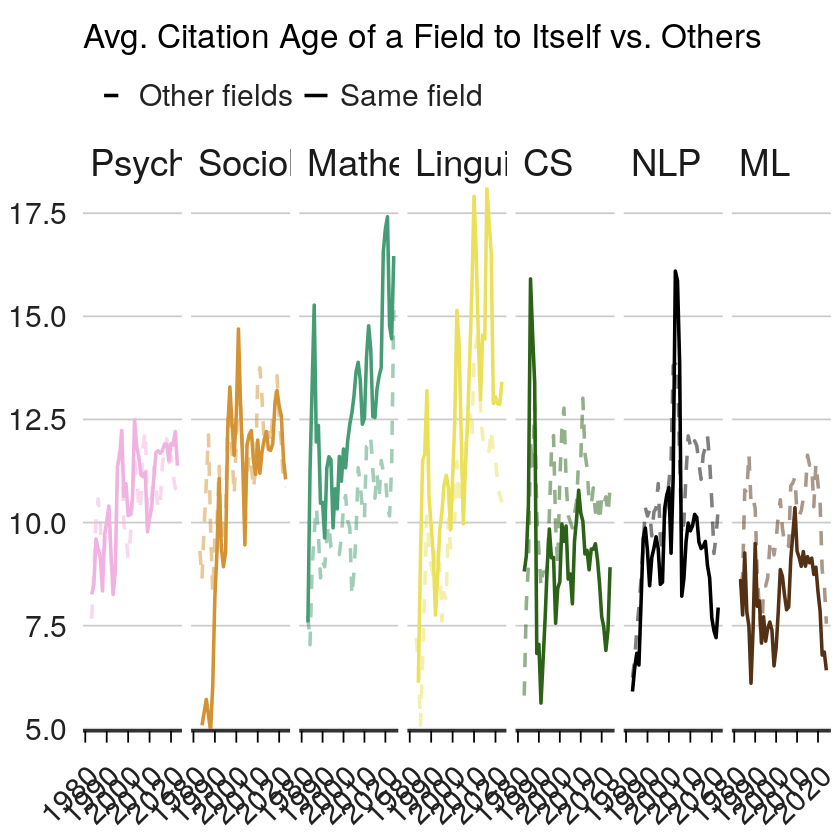

In [52]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)
library(zoo)

shade_color <- function(color) {
  return(scales::alpha(color, alpha = 0.5))
}

fields <- c("Psychology", "Sociology", "Mathematics", "Linguistics", "CS", "NLP", "ML")

# Assuming file names have 'Computer science' and not 'CS'. If this is not the case, adjust accordingly.
file_names <- c("Psychology", "Sociology", "Mathematics", "Linguistics", "Computer science", "NLP", "ML")

# Load the data
data_list <- file_names %>% 
  map(~ read.csv(paste0("data/byfield/", ., "_average_citation_age_to_self_and_others.csv"))) %>%
  set_names(fields)

# Add the field name as a column to each data frame
data_list <- data_list %>% 
  map2(fields, ~ mutate(.x, field = .y))

# Bind them together into a single data frame
df <- bind_rows(data_list)

df_long <- df %>% 
  gather(key = "type", value = "value", -year, -field)

df_long <- df_long %>% 
  filter(year > 1980) %>%
  filter(value <= 30)

df_long <- df_long %>%
  arrange(field, type, year) %>%
  group_by(field, type) %>%
  mutate(value = zoo::rollmean(value, k = 3, fill = NA, align = "right"))

# Modify the factor levels for type column for a better legend display
df_long$type <- factor(df_long$type, 
                       levels = c("average_citation_age_to_other_fields", "average_citation_age_to_self"),
                       labels = c("Other fields", "Same field"))  # Use more user-friendly labels

df_long$field <- factor(df_long$field, levels = c("Psychology", "Sociology", "Mathematics", "Linguistics", "CS", "NLP", "ML"))

# Create a named color vector based on the fields
field_colors <- c(
  "Psychology" = colors["Psychology"],
  "Sociology" = colors["Sociology"],
  "Mathematics" = colors["Mathematics"],
  "Linguistics" = colors["Linguistics"],
  "CS" = colors["CS"],
  "NLP" = colors["NLP"],
  "ML" = colors["ML"]
)

# Then, replot your graph with the modifications
p <- df_long %>%
  ggplot(aes(x = year, y = value, group = type, 
             color = ifelse(type == "Other fields", shade_color(field_colors[field]), field_colors[field]),
             linetype = type)) +  # Define linetype aesthetic based on type
  geom_line(size = 1) +
  facet_wrap(~ field, ncol = 7, scales = "free_x", dir = "v") +  # Adjust the direction of facets if needed
  scale_color_identity() +
  scale_linetype_manual(values = c("Other fields" = "dashed", "Same field" = "solid")) +  # Define linetype manually
  labs(subtitle = "Avg. Age of Citation of a Field to Itself vs. Others", 
       y = "Average Citation Age", x = "Year", linetype = "Citation Type") +  # Add linetype label
  scale_y_continuous(expand = c(0.0, 0.0)) +
  bbc_style() +
  general_theme + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Save the plots again as png and pdf
ggsave("./figures/citation_age_to_same_field_vs_others.png", p, dpi = 300, width = 20, height = 6)
ggsave("./figures/citation_age_to_same_field_vs_others.pdf", p, width = 20, height = 6)

p
